# Práctica 4 

## Santiago Blasco Arnaiz

# Divisivo basado en distancias (DB-Cluster)

In [1]:
import numpy as np
from math import inf
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import math, itertools

In [2]:
X = [[0,1,3,4,7],
    [1,0,4,4,8],
    [3,4,0,2,8],
    [4,4,2,0,7],
    [7,8,8,7,0]]

In [3]:
def variability(index, M):
    T = M.copy()
    v = 0
    
    for i in index:
        for j in index:

            if j > i:
                v = v + np.power((T[i][j]),2)
    v = v / (2 * np.power(len(index),2))
    
    return v

In [4]:
def bestPartition(clusters,M):
    clustersCopy = clusters.copy()
    T = M.copy()
    
    partition = [inf] * 4
    
    for c in clustersCopy:
        for i in range(1, math.ceil((len(c)+1)/2)):
            for part1 in list(itertools.combinations(c, i)):
                
                part2 = [item for item in c if item not in part1]
                v = ( len(list(part1)) * variability(part1,T) ) + ( len(list(part2)) * variability(part2,T) )
                if v < partition[3]:
                    partition = [c,list(part1),part2,v]
    
    #Le damos como altura la variabilidad del cluster del que proviene
    partition[3] = variability(partition[0],T)
                    
    return partition

In [5]:
def DBcluster(M):
    T = M.copy()
    
    clusterI = [[i for i in range(len(T))]]
    P = []
    U = []
    index = len(T)
    headC = [[i] for i in range(len(T))]
    headI = [i for i in range(len(T))]
    
    for i in range(len(M)-1):
        newPartition = bestPartition(clusterI,T)
        clusterI.remove(newPartition[0])
        
        if len(newPartition[1]) > 1:
            clusterI.append(newPartition[1])
        if len(newPartition[2]) > 1:
            clusterI.append(newPartition[2])
        P.insert(0,newPartition)
    
    for div in P:

        i = headC.index(div[1])
        j = headC.index(div[2])
        
        U.append([headI[min(i,j)],headI[max(i,j)],div[3],len(div[0])])

        del headC[max(i,j)]
        del headC[min(i,j)]
        
        del headI[max(i,j)]
        del headI[min(i,j)]
        
        headC.append(div[0])
        headI.append(index)

        index = index + 1
    
    U = np.array(U, dtype='float')
     
    return U
        
    

In [6]:
DBcluster(X)

array([[2.    , 3.    , 0.5   , 2.    ],
       [0.    , 1.    , 0.125 , 2.    ],
       [5.    , 6.    , 1.9375, 4.    ],
       [4.    , 7.    , 5.76  , 5.    ]])

In [7]:
Y = DBcluster(X)

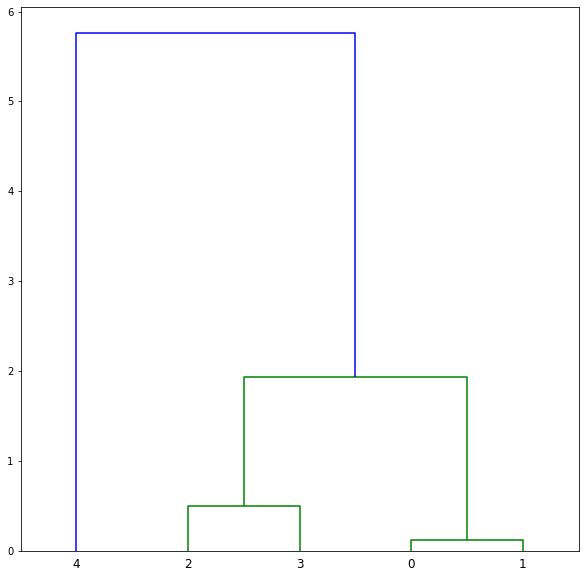

In [8]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Y)

# Ejercicio Iris (kmeans reducido con ward)

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import pandas as pd

In [10]:
#Cargamos el dataset
iris = load_iris()
X,Y = load_iris(return_X_y=True)
#Escalamos los datos
X = scale(X)
max_clusters = 15
min_clusters = 3


In [11]:
#Número de clusters
k = 6 + 9

kmeans = KMeans(n_clusters=k, random_state=7)
#Entrenamiento
kmeans.fit(X)

modaKmeans = -1 * np.ones(k, dtype='int')
for i in range(k):
    #Sacamos la moda de cada cluster
    modaKmeans[i] = mode(Y[np.argwhere(kmeans.labels_ == i)])[0].astype(int)

#Hacemos que los centroides obtenidos sean las muestras con las que trbaajrá ward 
X = kmeans.cluster_centers_

#Los valores objetivo son las modas de cada uno de los clusters
Y = modaKmeans
print(Y)

[1 0 2 1 0 0 2 2 1 1 1 2 2 2 0]


In [12]:
#Número de clusters
k = 6

clustering = AgglomerativeClustering(n_clusters= k, linkage="ward")
#Entrenamiento
clustering.fit(X)

moda = -1 * np.ones(k, dtype='int')
for i in range(k):
    #Sacamos la moda de cada cluster
    moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    
#Predicción
y_predict = moda[clustering.labels_]

#Calculamos el porcentaje de acierto
aciertosWard = accuracy_score(Y, y_predict)

print(aciertosWard)

0.8666666666666667


La tasa de acierto generando 15 clusters con kmeans y reduciendolos a 6 con warp es del 86'67 %